In [1]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
import torch
import warnings
warnings.filterwarnings('ignore')
from PIL import Image, ImageEnhance,ImageOps
import warnings
from contextlib import contextmanager
from transformers import MBartTokenizer, ViTImageProcessor,XLMRobertaTokenizer
from transformers import ProcessorMixin
from transformers import TrOCRProcessor


In [ ]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten") 
image_processor = ViTImageProcessor.from_pretrained(
    'microsoft/swin-base-patch4-window12-384-in22k'
)
tokenizer = MBartTokenizer.from_pretrained(
    'facebook/mbart-large-50'
)

In [2]:
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten") 

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [ ]:
model= VisionEncoderDecoderModel.from_pretrained(r"C:/Users/mahad/Desktop/fyp2/data/trocr_fine_tuned").to(device)

In [4]:

def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img

def ocr_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

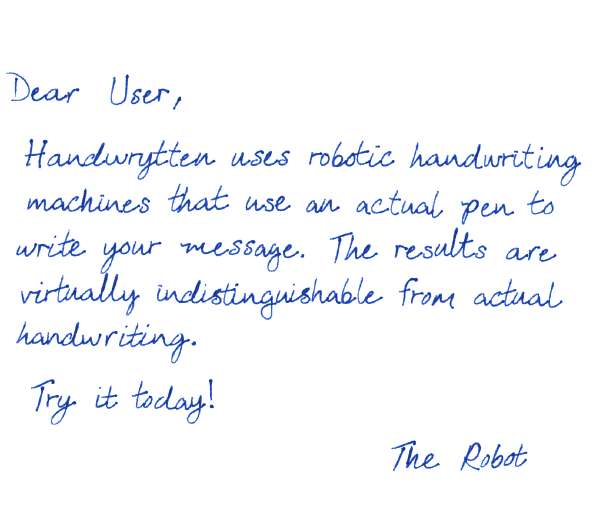

In [5]:
hw_image = show_image('sample.png')

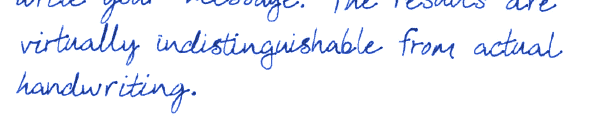

In [8]:
hw_image1 = hw_image.crop((0, 250, hw_image.size[0],370))
display(hw_image1)

In [9]:
ocr_image(hw_image1)

'virtually indistinguishable from actual'